In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-talk')
import numpy as np
import quantbullet.research.jump_model as jm
from quantbullet import set_package_log_level, set_figsize
set_package_log_level('info')

## Real Data

In [1]:
import yfinance as yf
# Define the ticker symbol
ticker_symbol = "TSLA"
# Fetch data
data = yf.download(ticker_symbol, interval="1d", period="500d")

[*********************100%%**********************]  1 of 1 completed


In [8]:
log_ret = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna().values
enriched_returns = jm.FeatureGenerator().enrich_features(log_ret)
enriched_returns = jm.FeatureGenerator().standarize_features(enriched_returns)

In [23]:
ctsJump = jm.ContinuousJumpModel()
best_states, best_loss, best_thetas = ctsJump.fit(enriched_returns, k=2, lambda_=100, n_trials=10)

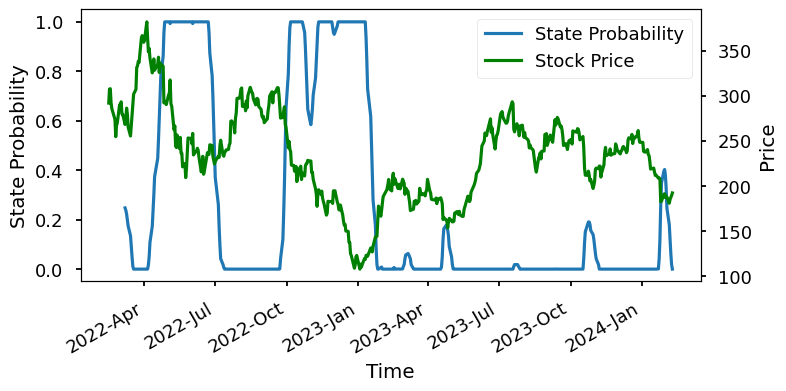

In [24]:
remapped_states, remapped_thetas = jm.arrange_state_prob_by_volatility(enriched_returns[:, 0], best_states, best_thetas, 0.5)
with set_figsize(8, 4):
    # Two states maybe flipped, so we need to rearrange them
    jm.TestingUtils().plot_state_probs(remapped_states, data['Adj Close'])

In [1]:
# res = ctsJump.predict(enriched_returns, remapped_thetas)